# Testing MLserver

In [160]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import random
import mlflow
import requests
from shapely import to_geojson

from countryguess.data import Dataset, TestDataset, ValDataset, TripletDataset
from countryguess.utils import poly_to_img, lines_to_img, normalize_geom

## Test data

In [144]:
test_data = Dataset(path='./data/drawings.geojson')

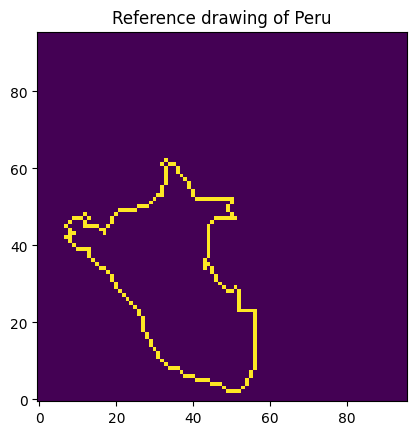

In [157]:
idx = random.randint(0, len(test_data) - 1)
drawing = test_data[idx]

#Plotting
plt.imshow(lines_to_img(drawing, shape=ref_data.shape), interpolation='nearest', origin='lower')
plt.title(f"Reference drawing of {test_data.country_name[idx]}") 
plt.show()

## Send request to MLserver

In [147]:
url = "http://localhost:5001/predict"

In [158]:
response = requests.post(url, json=to_geojson(drawing))
print(response)

<Response [200]>


In [159]:
print(response.json())

['Peru', 'Martinique', 'Estonia', 'Belgium', 'El Salvador', 'Paraguay', 'Kuwait', 'Egypt', 'Liberia', 'Bahamas, The', 'Iraq', 'Angola', 'Georgia', 'Armenia', 'Colombia', 'Myanmar (Burma)', 'Latvia', 'France', 'Guyana', 'Zaire', 'Netherlands Antilles', 'Spain', 'Mozambique', 'Kazakhstan', 'Bosnia and Herzegovina', 'South Korea', 'Jamaica', 'Australia', 'Tunisia', 'Bahrain', 'South Georgia and the South Sandwich Is', 'Algeria', 'Ireland', 'Iran', 'Benin', 'Heard Island & McDonald Islands', 'Uzbekistan', 'China', 'Dominica', 'Honduras', 'Somalia', 'Byelarus', 'Bhutan', 'Kyrgyzstan', 'Costa Rica', 'Mexico', 'Mongolia', 'West Bank', 'Turks and Caicos Islands', 'Croatia', 'Greenland', 'Finland', 'Panama', 'Nepal', 'Papua New Guinea', 'Svalbard', 'Djibouti', 'Nicaragua', 'Tanzania, United Republic of', 'Ghana', 'Luxembourg', 'Slovakia', 'Israel', 'Kenya', 'New Caledonia', 'Yemen', 'Guinea', 'Belize', 'Turkmenistan', 'Chile', 'Guatemala', 'Burkina Faso', 'Barbados', 'Brazil', 'Switzerland', 'M

## Compare to local model

In [150]:
model = mlflow.pytorch.load_model(f"models:/triplet_model@Champion")
ref_data = Dataset(shape=model.shape)
model.load_reference(ref_data)

In [151]:
print(predict(model, drawing))

['Mauritania', 'Cameroon', 'Congo', 'Fiji', 'Burkina Faso', 'Oman', 'Madagascar', 'Pacific Islands (Palau)', 'Pakistan', 'North Korea', 'Mozambique', 'South Korea', 'Spain', 'Iraq', 'Norway', 'Kyrgyzstan', 'Guam', 'West Bank', 'St. Lucia', 'Hungary', 'Ghana', 'Argentina', 'Chile', 'Latvia', 'Yemen', 'Djibouti', 'Central African Republic', 'Estonia', 'Man, Isle of', 'Dominica', 'Jan Mayen', 'Swaziland', 'Nicaragua', 'New Zealand', 'Switzerland', 'Somalia', 'Zaire', 'Morocco', 'United Arab Emirates', 'Australia', 'Finland', 'Algeria', 'Kuwait', 'Byelarus', 'Israel', 'Benin', 'Peru', 'Bhutan', 'Slovakia', 'Guatemala', 'Mali', 'Kazakhstan', 'Qatar', 'Ireland', 'Honduras', 'Niger', 'Austria', 'Slovenia', 'Western Sahara', 'Cyprus', 'Thailand', 'Afghanistan', 'Sweden', 'Guyana', 'Bahrain', 'Romania', 'Guadeloupe', 'Sudan', 'Kenya', 'Rwanda', 'Uganda', 'South Africa', 'Netherlands Antilles', 'Myanmar (Burma)', 'Brunei', 'Tanzania, United Republic of', 'Colombia', 'Haiti', 'Angola', 'Reunion',